# The following notebook has been developed to study and understand the perceptron learning algorithm in machine learning. The perceptron algorithm is one of the simplest yet effective classification algorithm which is widely used in machine learning applications. It helps in findind a decision boundary between the two classes of the dataset we have considered.

### The Perceptron learning algorithm is implemented by calling an in-built python library that works as given below. To observe the plots and understand them matplotlib library has been used. The red wine quality dataset has been used for the classification of wine quality. Here the red dots represent wine quality which  has score greater than 5 whereas the blue crosses are intuitively bad wines which has score less than 5

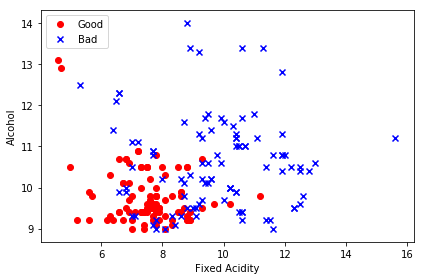

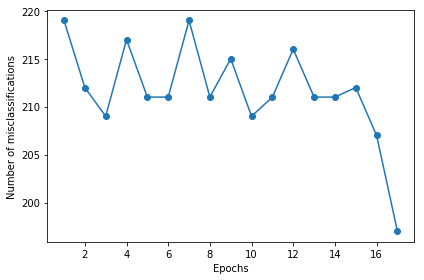

In [15]:
import numpy as np


class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)



import pandas as pd

df = pd.read_csv('/home/shriansh/Downloads/winequality_red.csv', header=None)
df.tail()


%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

y = df.iloc[1:500, 11].values
y = np.where(y > '5', -1, 1)

X = df.iloc[1:500, [0,10]].values

# plot data
plt.scatter(X[1:100, 0], X[1:100, 1],
            color='red', marker='o', label='Good')
plt.scatter(X[400:500, 0], X[400:500, 1],
            color='blue', marker='x', label='Bad')

plt.xlabel('Fixed Acidity')
plt.ylabel('Alcohol')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./iris_1.png', dpi=300)
plt.show()

ppn = Perceptron(eta=0.1, n_iter=17)

ppn.fit(X.astype(float), y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')

plt.tight_layout()
# plt.savefig('./perceptron_1.png', dpi=300)
plt.show()



from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)





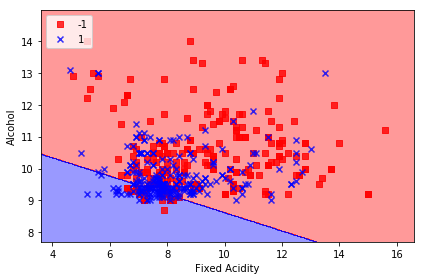

In [16]:
plot_decision_regions(X.astype(float), y, classifier=ppn)
plt.xlabel('Fixed Acidity')
plt.ylabel('Alcohol')
plt.legend(loc='upper left')

plt.tight_layout()
plt.savefig('./perceptron_2.png', dpi=300)
plt.show()